In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

ModuleNotFoundError: No module named 'seaborn'

In [2]:
import sys, subprocess
subprocess.check_call([sys.executable, "-m", "pip", "install", "seaborn"])

0

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [2]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
# Fill missing age with median
df["age"] = df["age"].fillna(df["age"].median())

# Fill missing embarked with mode
df["embark_town"] = df["embark_town"].fillna(df["embark_town"].mode()[0])

# Drop deck (too many missing values)
df = df.drop(columns=["deck"])

df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [6]:
# Create family size feature
df["family_size"] = df["sibsp"] + df["parch"] + 1

# Create is_child feature
df["is_child"] = df["age"].apply(lambda x: 1 if x < 12 else 0)

df[["age", "sibsp", "parch", "family_size", "is_child"]].head()

,age,sibsp,parch,family_size,is_child
0,22.0,1,0,2,0
1,38.0,1,0,2,0
2,26.0,0,0,1,0
3,35.0,1,0,2,0
4,35.0,0,0,1,0


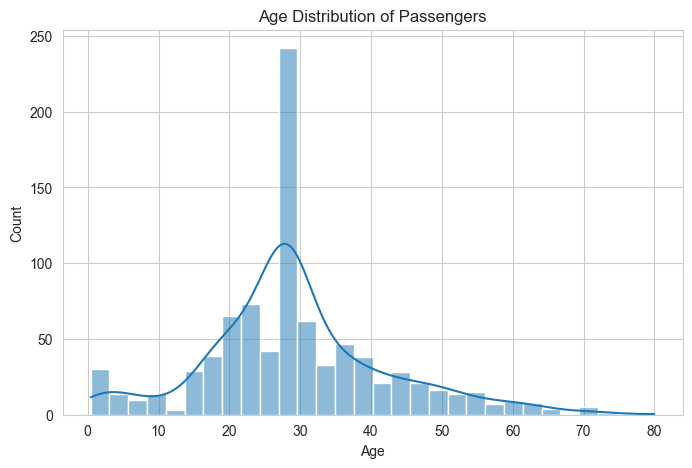

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df["age"], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

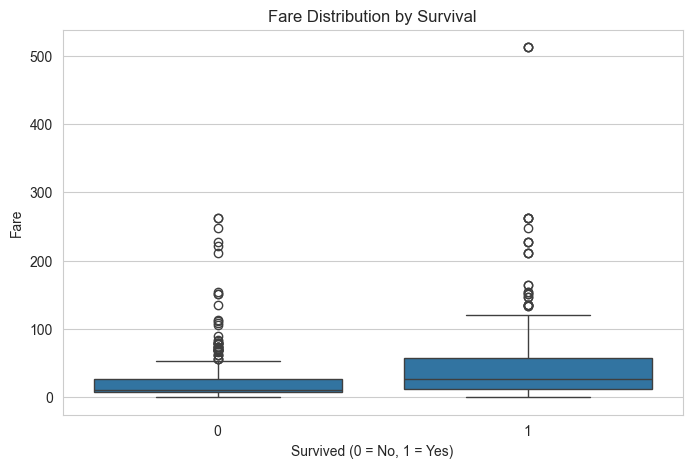

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x="survived", y="fare", data=df)
plt.title("Fare Distribution by Survival")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Fare")
plt.show()

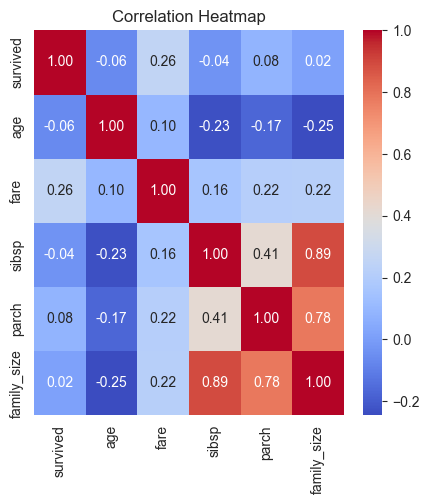

In [11]:
plt.figure(figsize=(5,5))
corr = df[["survived", "age", "fare", "sibsp", "parch", "family_size"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

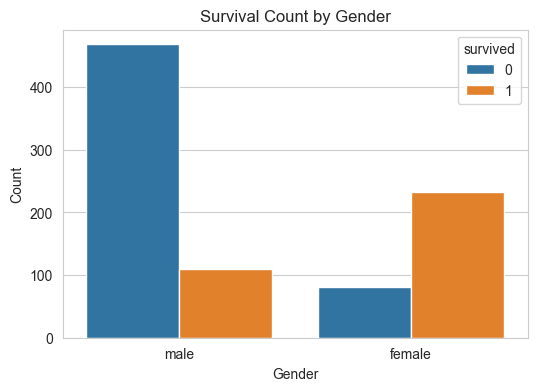

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x="sex", hue="survived", data=df)
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()